# Use Prophet to predict price of Avocado
Import data and modules.
Original code provided by Samuel Belko on Kaggle.

In [2]:
import numpy as np 
import pandas as pd 
from fbprophet import Prophet

%matplotlib inline

In [3]:
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Convert format to pandas date

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
num_list_items = 10
regions = df.groupby(df.region)
print("Total regions : ", len(regions))
print("Printing first ", num_list_items, " regions.")
print("-------------")
for name, group in regions:
    print(name, " : ", len(group))
    num_list_items -= 1
    if num_list_items == 0: break

Total regions :  54
Printing first  10  regions.
-------------
Albany  :  338
Atlanta  :  338
BaltimoreWashington  :  338
Boise  :  338
Boston  :  338
BuffaloRochester  :  338
California  :  338
Charlotte  :  338
Chicago  :  338
CincinnatiDayton  :  338


In [6]:
PREDICTING_FOR = "TotalUS"

In [7]:
date_price = regions.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)

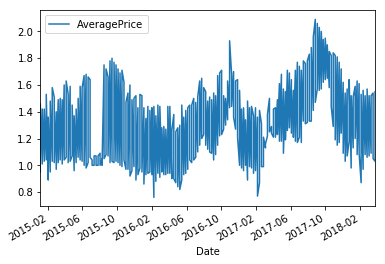

In [8]:
date_price.plot(x='Date', y='AveragePrice', kind="line")


rename df for fbprophet library

In [9]:
date_price = date_price.rename(columns={'Date':'ds', 'AveragePrice':'y'})

create & fit model. 

In [10]:
m = Prophet()
m.fit(date_price)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [12]:
forecast.tail()


,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,yhat
698,2019-03-21,1.590754,1.583687,1.596916,1.170948,1.847668,-0.090624,-0.090624,-0.090624,0.0,0.0,0.0,-0.090624,-0.090624,-0.090624,1.500130
699,2019-03-22,1.591050,1.583970,1.597243,1.195996,1.862886,-0.086099,-0.086099,-0.086099,0.0,0.0,0.0,-0.086099,-0.086099,-0.086099,1.504951
700,2019-03-23,1.591346,1.584253,1.597574,1.159640,1.845806,-0.081283,-0.081283,-0.081283,0.0,0.0,0.0,-0.081283,-0.081283,-0.081283,1.510063
701,2019-03-24,1.591643,1.584536,1.597904,1.189552,1.831556,-0.076238,-0.076238,-0.076238,0.0,0.0,0.0,-0.076238,-0.076238,-0.076238,1.515404
702,2019-03-25,1.591939,1.584820,1.598233,1.205630,1.850421,-0.071032,-0.071032,-0.071032,0.0,0.0,0.0,-0.071032,-0.071032,-0.071032,1.520907


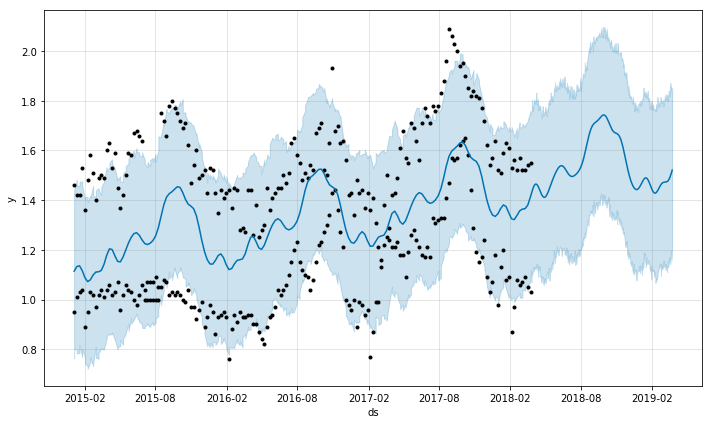

In [13]:
figure1 = m.plot(forecast)

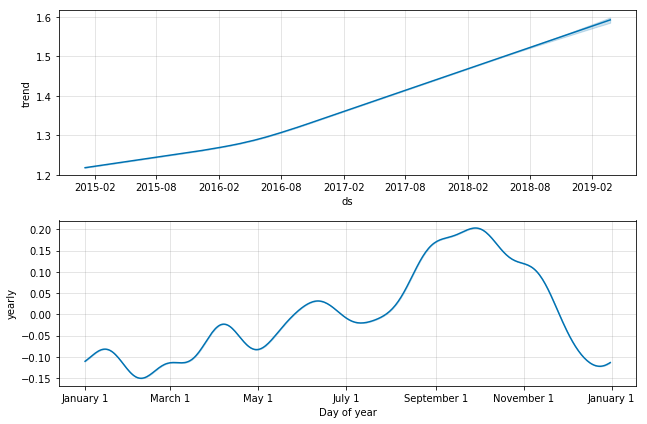

In [14]:
figure2 = m.plot_components(forecast)